<a href="https://colab.research.google.com/github/TatyanaKorolevaa/BigData_Seminar3/blob/master/HW_KorolevaT_seminar3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import requests
import json

api_key = 'dbrKFnXTyvxi38gkAzul8UxeZpGybdlt'

cities = ['Moscow', 'New York', 'Tokyo']

weather_data = {}

for city in cities:
    url = f'https://api.tomorrow.io/v4/timelines?location={city}&fields=temperature&timesteps=current&apikey={api_key}'
    response = requests.get(url)
    data = response.json()
    weather_data[city] = data


for city, data in weather_data.items():
    print(f"Weather in {city}:")
    print(data)
    print()


with open('weather_data_tomorrowio.json', 'w') as file:
    json.dump(weather_data, file)

print("Данные о погоде сохранены в файл 'weather_data_tomorrowio.json'")

Weather in Moscow:
{'data': {'timelines': [{'timestep': 'current', 'endTime': '2024-09-19T16:29:00Z', 'startTime': '2024-09-19T16:29:00Z', 'intervals': [{'startTime': '2024-09-19T16:29:00Z', 'values': {'temperature': 16.81}}]}]}}

Weather in New York:
{'data': {'timelines': [{'timestep': 'current', 'endTime': '2024-09-19T16:29:00Z', 'startTime': '2024-09-19T16:29:00Z', 'intervals': [{'startTime': '2024-09-19T16:29:00Z', 'values': {'temperature': 17.88}}]}]}}

Weather in Tokyo:
{'data': {'timelines': [{'timestep': 'current', 'endTime': '2024-09-19T16:29:00Z', 'startTime': '2024-09-19T16:29:00Z', 'intervals': [{'startTime': '2024-09-19T16:29:00Z', 'values': {'temperature': 24.13}}]}]}}

Данные о погоде сохранены в файл 'weather_data_tomorrowio.json'


In [16]:
pip install hdfs

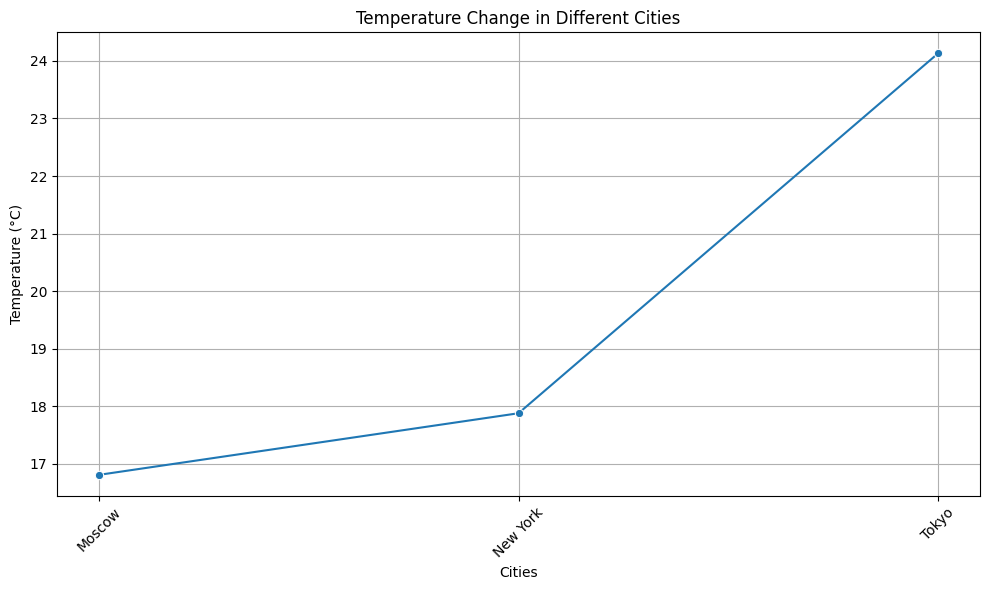

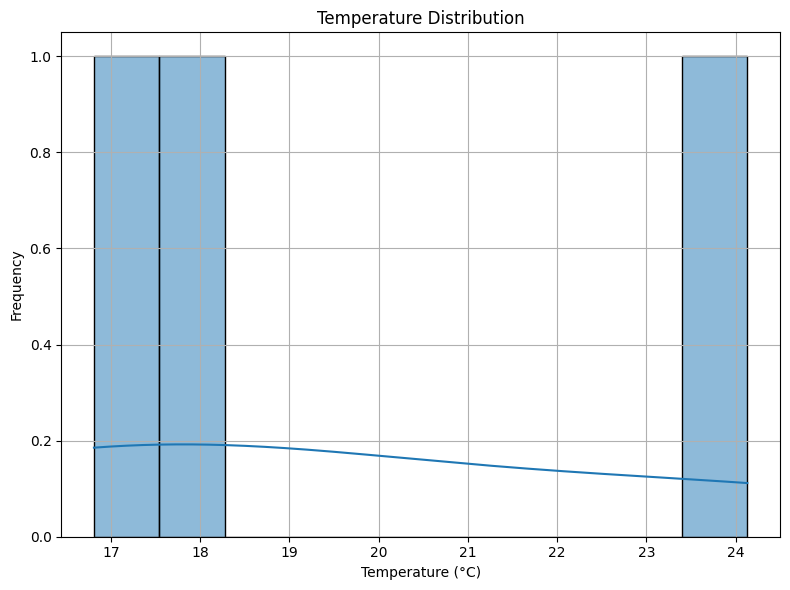

ConnectionError: HTTPConnectionPool(host='localhost', port=50070): Max retries exceeded with url: /webhdfs/v1/user/weather/temperature_change.png?user.name=root&overwrite=False&op=CREATE (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7adef7cde4a0>: Failed to establish a new connection: [Errno 111] Connection refused'))

In [17]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from hdfs import InsecureClient


with open('weather_data_tomorrowio.json', 'r') as file:
    weather_data = json.load(file)

temperature_data = []

for city, data in weather_data.items():
    temperature = data['data']['timelines'][0]['intervals'][0]['values']['temperature']
    temperature_data.append((city, temperature))

df = pd.DataFrame(temperature_data, columns=['City', 'Temperature'])


plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='City', y='Temperature', marker='o')
plt.title('Temperature Change in Different Cities')
plt.xlabel('Cities')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('temperature_change.png')
plt.show()


plt.figure(figsize=(8, 6))
sns.histplot(df['Temperature'], bins=10, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.savefig('temperature_distribution.png')
plt.show()


client = InsecureClient('http://localhost:50070')
with client.write('/user/weather/temperature_change.png', encoding='utf-8') as writer:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='City', y='Temperature', marker='o')
    plt.title('Temperature Change in Different Cities')
    plt.xlabel('Cities')
    plt.ylabel('Temperature (°C)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(writer)

with client.write('/user/weather/temperature_distribution.png', encoding='utf-8') as writer:
    plt.figure(figsize=(8, 6))
    sns.histplot(df['Temperature'], bins=10, kde=True)
    plt.title('Temperature Distribution')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(writer)


client.download('/user/weather/temperature_change.png', 'temperature_change_hdfs.png', overwrite=True)
client.download('/user/weather/temperature_distribution.png', 'temperature_distribution_hdfs.png', overwrite=True)

